### House Prices - Advanced Regression Techniques
### Import Libraries

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

# Split arrays into random train and test subsets
from sklearn.model_selection import train_test_split

# Apply different transformations to each type of data
from sklearn.compose import make_column_transformer, ColumnTransformer

# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.kernel_ridge import KernelRidge

# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Pipeline
from sklearn.pipeline import Pipeline, make_pipeline

# Handling missing values in dataset
from sklearn.impute import SimpleImputer

# Preprocessing
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

### Data Acquisition

In [122]:
df_train = pd.read_csv("C:\\Users\\felip\\OneDrive\\Documentos\\kaggle\\house-prices-advanced-regression-techniques\\train.csv")
df_test = pd.read_csv("C:\\Users\\felip\\OneDrive\\Documentos\\kaggle\\house-prices-advanced-regression-techniques\\test.csv")

### Data Cleaning

#### Missing values

In [123]:
# Fill <NA> with "No"
df_train["Alley"].fillna("No", inplace=True)
df_test["Alley"].fillna("No", inplace=True)

df_train["PoolQC"].fillna("No", inplace=True)
df_test["PoolQC"].fillna("No", inplace=True)

df_train["Fence"].fillna("No", inplace=True)
df_test["Fence"].fillna("No", inplace=True)

df_train["FireplaceQu"].fillna("No", inplace=True)
df_test["FireplaceQu"].fillna("No", inplace=True)

df_train["MiscFeature"].fillna("No", inplace=True)
df_test["MiscFeature"].fillna("No", inplace=True)

df_train["MasVnrArea"].fillna(0, inplace=True)
df_test["MasVnrArea"].fillna(0, inplace=True)

df_train["LotFrontage"].fillna(0, inplace=True)
df_test["LotFrontage"].fillna(0, inplace=True)

df_train["GarageFinish"].fillna("No", inplace=True)
df_test["GarageFinish"].fillna("No", inplace=True)

df_train["GarageType"].fillna("No", inplace=True)
df_test["GarageType"].fillna("No", inplace=True)

df_train["GarageQual"].fillna("No", inplace=True)
df_test["GarageQual"].fillna("No", inplace=True)

df_train["GarageCond"].fillna("No", inplace=True)
df_test["GarageCond"].fillna("No", inplace=True)

df_train["BsmtExposure"].fillna("No", inplace=True)
df_test["BsmtExposure"].fillna("No", inplace=True)

df_train["BsmtFinType2"].fillna("Unf", inplace=True)
df_test["BsmtFinType2"].fillna("Unf", inplace=True)

df_train["BsmtFinType1"].fillna("No", inplace=True)
df_test["BsmtFinType1"].fillna("No", inplace=True)

df_train["BsmtCond"].fillna("No", inplace=True)
df_test["BsmtCond"].fillna("No", inplace=True)

df_train["BsmtQual"].fillna("No", inplace=True)
df_test["BsmtQual"].fillna("No", inplace=True)

df_train["MasVnrType"].fillna("No", inplace=True)
df_test["MasVnrType"].fillna("No", inplace=True)

df_train["Electrical"].fillna("SBrkr", inplace=True)
df_test["Electrical"].fillna("SBrkr", inplace=True)

df_train["GarageYrBlt"].fillna(0, inplace=True)
df_test["GarageYrBlt"].fillna(0, inplace=True)

df_train = df_train.convert_dtypes()
df_test = df_test.convert_dtypes()

print(df_train.tail(), df_test.tail())

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL           62     7917   Pave    No      Reg   
1456  1457          20       RL           85    13175   Pave    No      Reg   
1457  1458          70       RL           66     9042   Pave    No      Reg   
1458  1459          20       RL           68     9717   Pave    No      Reg   
1459  1460          20       RL           75     9937   Pave    No      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1455

C:\Users\felip\AppData\Local\Temp\ipykernel_22960\2401129094.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train["Alley"].fillna("No", inplace=True)
C:\Users\felip\AppData\Local\Temp\ipykernel_22960\2401129094.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

### EDA (Exploratory Data Analysis)

##### Train

In [124]:
print(df_train.columns)
print(df_train.info())
print(df_train.isnull().sum().sort_values(ascending=False))

# Check if the all of the columns have 0 null values
print(sum(df_train.isnull().sum() != 0)) 

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [125]:
print(df_train["GarageYrBlt"].unique())


<IntegerArray>
[2003, 1976, 2001, 1998, 2000, 1993, 2004, 1973, 1931, 1939, 1965, 2005, 1962,
 2006, 1960, 1991, 1970, 1967, 1958, 1930, 2002, 1968, 2007, 2008, 1957, 1920,
 1966, 1959, 1995, 1954, 1953,    0, 1983, 1977, 1997, 1985, 1963, 1981, 1964,
 1999, 1935, 1990, 1945, 1987, 1989, 1915, 1956, 1948, 1974, 2009, 1950, 1961,
 1921, 1900, 1979, 1951, 1969, 1936, 1975, 1971, 1923, 1984, 1926, 1955, 1986,
 1988, 1916, 1932, 1972, 1918, 1980, 1924, 1996, 1940, 1949, 1994, 1910, 1978,
 1982, 1992, 1925, 1941, 2010, 1927, 1947, 1937, 1942, 1938, 1952, 1928, 1922,
 1934, 1906, 1914, 1946, 1908, 1929, 1933]
Length: 98, dtype: Int64


#### Skew

Skew: 1.8828757597682129


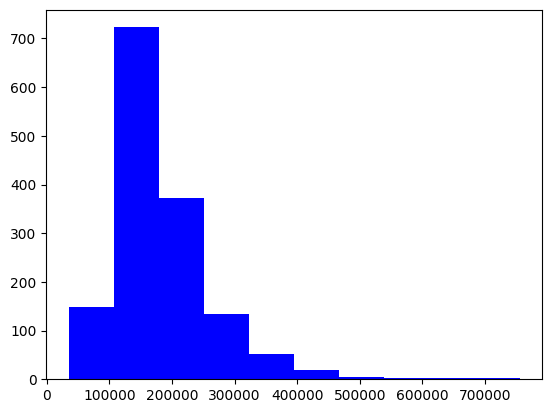

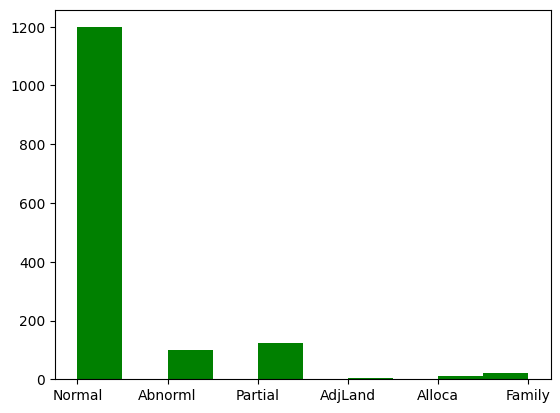

In [126]:
print(f"Skew: {df_train['SalePrice'].skew()}")
plt.hist(df_train["SalePrice"], color="blue")
plt.show()

plt.hist(df_train["SaleCondition"], color="green")
plt.show()

##### Test

In [127]:
print(df_test.columns)
print(df_test.info())
print(df_test.isnull().sum().sort_values(ascending=False))

# Check if the all of the columns have 0 null values
print(sum(df_test.isnull().sum() != 0))

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#### Data Preprocessing
#### One-Hot Encoding

In [128]:
def encode(x): return 1 if x == "Partial" else 0
df_train["encode_condition"] = df_train["SaleCondition"].apply(encode)
df_test["encode_condition"] = df_train["SaleCondition"].apply(encode)

In [129]:
df_train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,encode_condition
1455,1456,60,RL,62,7917,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,No,0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,No,No,No,0,8,2007,WD,Normal,175000,0
1456,1457,20,RL,85,13175,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,No,MnPrv,No,0,2,2010,WD,Normal,210000,0
1457,1458,70,RL,66,9042,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,No,0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,No,GdPrv,Shed,2500,5,2010,WD,Normal,266500,0
1458,1459,20,RL,68,9717,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,No,0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,No,Attchd,1950,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,No,No,No,0,4,2010,WD,Normal,142125,0
1459,1460,20,RL,75,9937,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,No,0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,No,Attchd,1965,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,No,No,No,0,6,2008,WD,Normal,147500,0


#### Feature Engineering

In [130]:
df_train["house_age"] = df_train["YrSold"] - df_train["YearBuilt"]
df_test["house_age"] = df_test["YrSold"] - df_test["YearBuilt"]

df_train["house_remodelage"] = df_train["YrSold"] - df_train["YearRemodAdd"]
df_test["house_remodelage"] = df_test["YrSold"] - df_test["YearRemodAdd"]

df_train["total_area"] = df_train["GrLivArea"] + df_train["TotalBsmtSF"]
df_test["total_area"] = df_test["GrLivArea"] + df_test["TotalBsmtSF"]

df_test.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,encode_condition,house_age,house_remodelage,total_area
1454,2915,160,RM,21,1936,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,No,0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,546,546,GasA,Gd,Y,SBrkr,546,546,0,1092,0,0,1,1,3,1,TA,5,Typ,0,No,No,0,No,0,0,No,No,Y,0,0,0,0,0,0,No,No,No,0,6,2006,WD,Normal,0,36,36,1638
1455,2916,160,RM,21,1894,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,No,0,TA,TA,CBlock,TA,TA,No,Rec,252,Unf,0,294,546,GasA,TA,Y,SBrkr,546,546,0,1092,0,0,1,1,3,1,TA,6,Typ,0,No,CarPort,1970,Unf,1,286,TA,TA,Y,0,24,0,0,0,0,No,No,No,0,4,2006,WD,Abnorml,0,36,36,1638
1456,2917,20,RL,160,20000,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,No,0,TA,TA,CBlock,TA,TA,No,ALQ,1224,Unf,0,0,1224,GasA,Ex,Y,SBrkr,1224,0,0,1224,1,0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960,Unf,2,576,TA,TA,Y,474,0,0,0,0,0,No,No,No,0,9,2006,WD,Abnorml,0,46,10,2448
1457,2918,85,RL,62,10441,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,No,0,TA,TA,PConc,Gd,TA,Av,GLQ,337,Unf,0,575,912,GasA,TA,Y,SBrkr,970,0,0,970,0,1,1,0,3,1,TA,6,Typ,0,No,No,0,No,0,0,No,No,Y,80,32,0,0,0,0,No,MnPrv,Shed,700,7,2006,WD,Normal,0,14,14,1882
1458,2919,60,RL,74,9627,Pave,No,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94,TA,TA,PConc,Gd,TA,Av,LwQ,758,Unf,0,238,996,GasA,Ex,Y,SBrkr,996,1004,0,2000,0,0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993,Fin,3,650,TA,TA,Y,190,48,0,0,0,0,No,No,No,0,11,2006,WD,Normal,0,13,12,2996


##### Filtering the dataframes (train and test)

In [131]:
df_train = df_train.drop(columns=["YrSold", "YearBuilt", "YearRemodAdd", "GrLivArea", "TotalBsmtSF"])
df_test = df_test.drop(columns=["YrSold", "YearBuilt", "YearRemodAdd", "GrLivArea", "TotalBsmtSF"])
print(df_train.columns)
print(df_test.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPor

##### Correlation Matrix

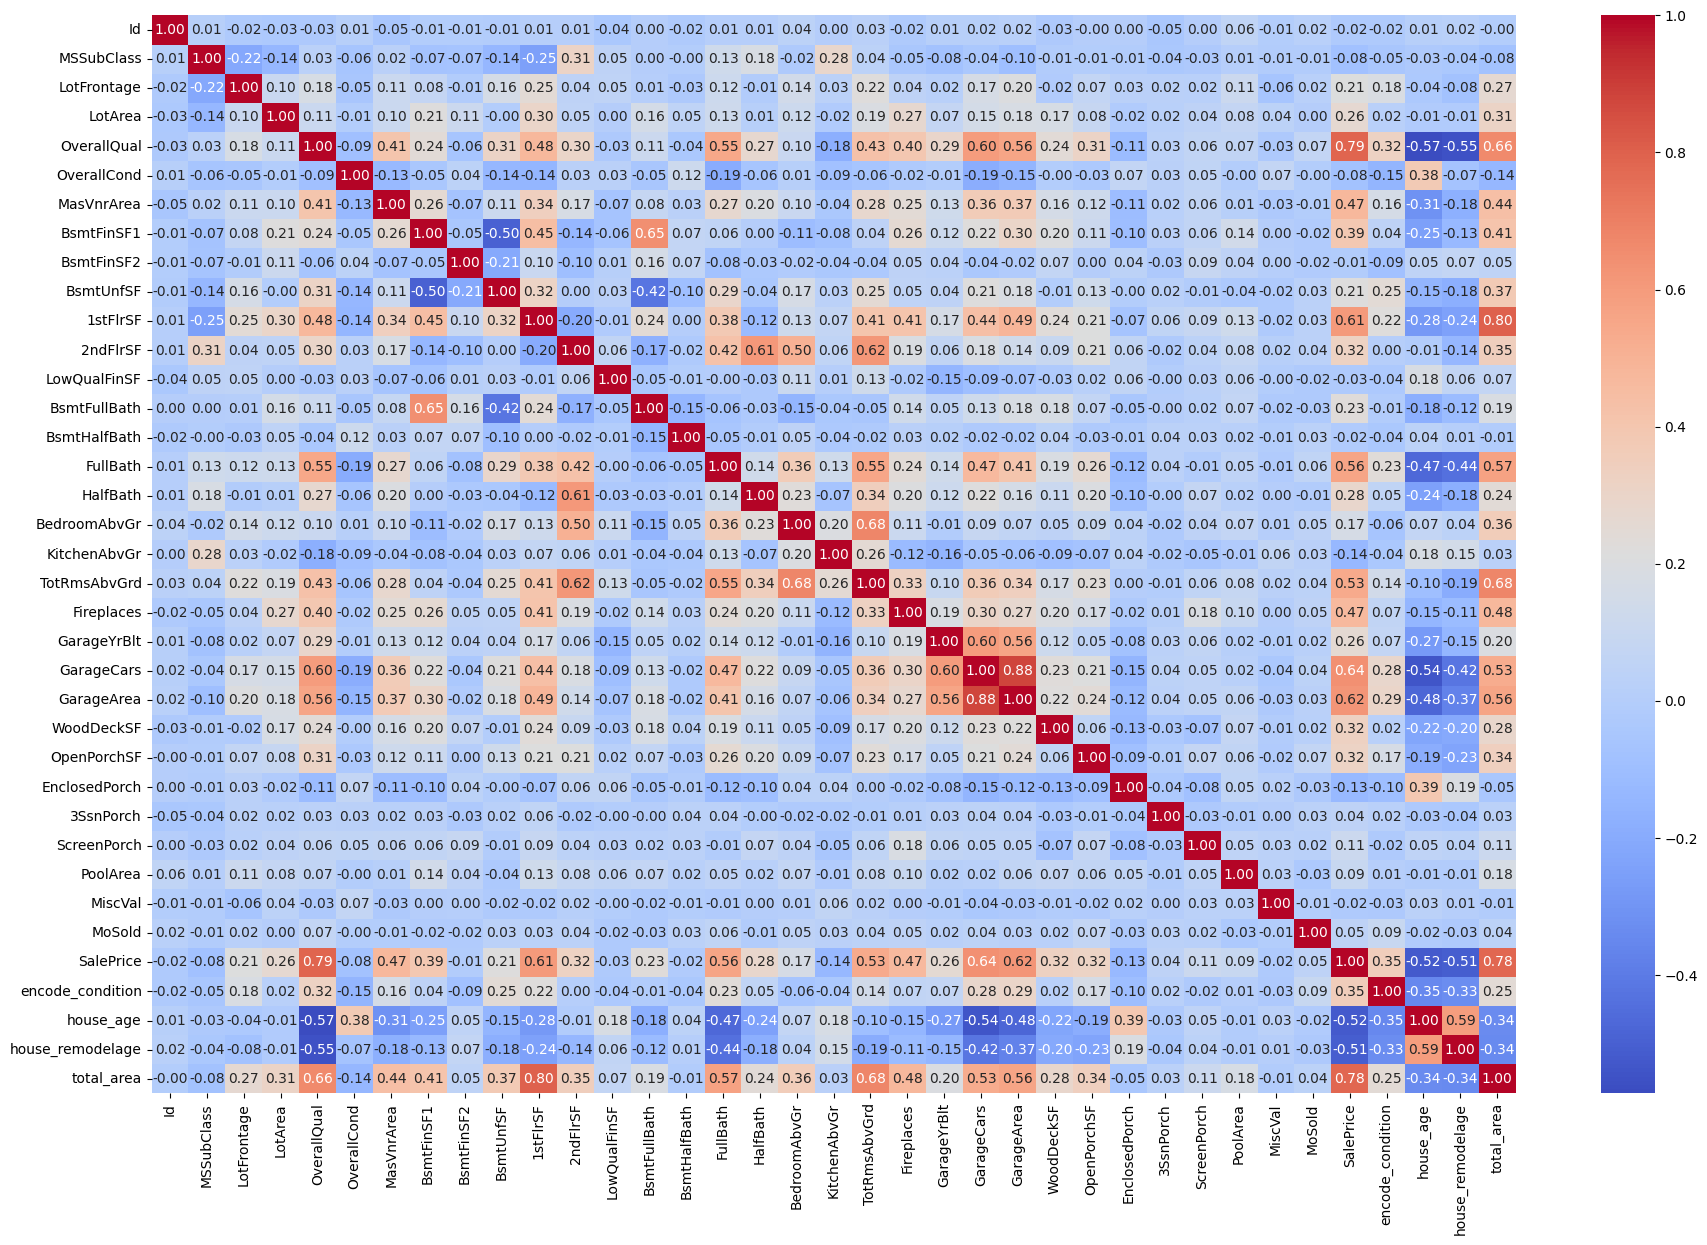

In [132]:
plt.figure(figsize=(22, 14))

# Select only columns with int and float data types
numeric_df_train = df_train.select_dtypes(include=["int64", "float64"])

sns.heatmap(numeric_df_train.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

##### Distribution Sale Price

<Axes: xlabel='SalePrice', ylabel='Count'>

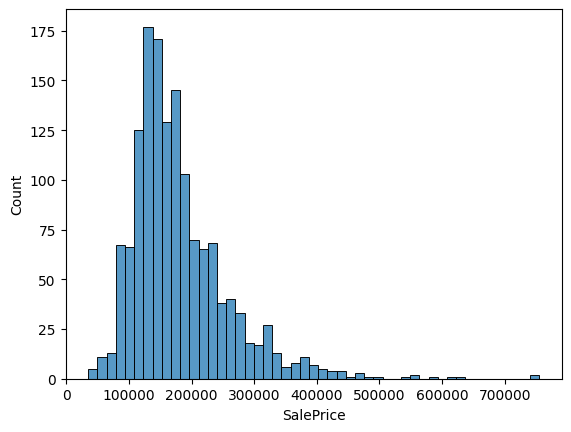

In [133]:
sns.histplot(df_train, x=df_train["SalePrice"])

##### Distribution Sale Price with Natural Logarithm Transformation
###### The natural logarithm of 1 plus the input array, which is useful for handling zero values and improving the distribution of the data. This transformation can help stabilize variance and make the data more normally distributed, which can be beneficial for many statistical models and machine learning algorithms.

<Axes: xlabel='SalePrice', ylabel='Count'>

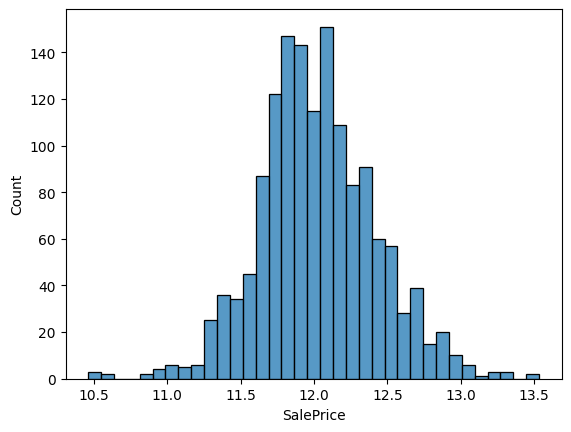

In [134]:
sns.histplot(df_train, x=np.log1p(df_train["SalePrice"]))

#### Delete the column "SalePrice"

In [135]:
num_cols = df_train.select_dtypes(include=["Int64", "Float64"]).columns
num_cols = df_train.drop("SalePrice", axis=1)
num_cols.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPor

#### Model

In [136]:
X = df_train[["OverallQual", "LotFrontage", "1stFlrSF", "TotRmsAbvGrd"]]
y = df_train["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Create an instance of LinearRegression
lr = LinearRegression()

# Fit the model on the training data
lr.fit(X_train, y_train)

# Make predictions on the test data
y_predictions = lr.predict(X_test)

# Print the predictions
print("Predictions:", y_predictions)

Predictions: [167945.70330177 279107.89341364 124394.09921661 173553.73443003
 293731.71328768  56804.50135723 222179.35186348 167206.21661565
  56804.50135723 141965.58268944 193329.29972824 117377.89225509
  58220.64736753 230914.78995966 171725.74165155 131567.1308862
 199736.99650725 137184.16418514 165577.08441871 228365.96237507
 183476.91884706 222646.5155791  161384.42346809 111790.71939041
 218048.4178963  165839.16930972 213882.31420768  73901.55603481
 169349.08748277 206570.92026748 119753.24738644 215103.48357225
 208113.70959553  79803.99867941 276769.0050611  162656.37304939
 145624.87339873 208222.59551655 282015.52199761 109415.10445157
 156850.25878199 226006.02631638 120813.25162078 295296.5227767
 123369.59487612 189044.72155783 119033.19200279 129181.08681557
 365063.97339183 133580.19240334 130749.91014414 183168.84013534
  98410.21894565 351615.97734093 142587.62849715 239762.81248691
 207030.05791374 137794.36113625 169818.97558719 115289.69079675
  59523.756050

##### Model Evaluation

In [137]:
# Print the metrics
print("mean_absolute_error:", mean_absolute_error(y_test, y_predictions))
print("mean_squared_error:", mean_squared_error(y_test, y_predictions))

mean_absolute_error: 27715.192547786617
mean_squared_error: 1910441786.7055523


##### Model Test

In [138]:
X_test = df_test[["OverallQual", "LotFrontage", "1stFlrSF", "TotRmsAbvGrd"]]

# Model
y_predictions = lr.predict(X_test)
y_predictions

array([118118.80590232, 179543.36057124, 127854.65726805, ...,
       148200.386169  , 129911.83113849, 223017.8186003 ])

#### Check Lengths between y_predictions and df_test

In [139]:
print(len(y_predictions))
print(len(df_test))

1459
1459


In [140]:
print(y_predictions)

[118118.80590232 179543.36057124 127854.65726805 ... 148200.386169
 129911.83113849 223017.8186003 ]


In [141]:
submission = pd.Series(y_predictions, index=df_test["Id"], name="SalePrice")
print(submission.shape)
submission.head()

(1459,)


Id
1461    118118.805902
1462    179543.360571
1463    127854.657268
1464    169654.056055
1465    237117.790019
Name: SalePrice, dtype: float64

### Generate CSV to submission

In [142]:
submission.to_csv("submission.csv", header=True)